In [1]:
from timestamp import *
import re
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats
import matplotlib
from threading import Thread
from analysis import *


In [2]:
res1 = read_file('res-1.txt')
res2 = read_file('res-2.txt')

h1 = analysis(res1,res2,'res-1','res-2')
h2 = analysis(res2,res1,'res2','res-1')

diff1 = compute_ttx(res1)
diff2 = compute_ttx(res2)
diff_r1 = compute_trx(res1)
diff_r2 = compute_trx(res2)
print('scan freq(res-1): ',scan_frequency(res1))
print('scan freq(res-2): ',scan_frequency(res2))
print('Average Ttx (res-1): ',np.average(diff1)/1000)
print('Average Ttx (res-2): ',np.average(diff2)/1000)
print('Average Trx (res-1): ',np.average(diff_r1)/1000)
print('Average Trx (res-2): ',np.average(diff_r2)/1000)
print('Standard deviation: Ttx')
print(np.std(diff1)/1000)
print(np.std(diff2)/1000)
print('Standard deviation: Trx')
print(np.std(diff_r1)/1000)
print(np.std(diff_r2)/1000)
B = 0
S = 0
for line in res1:
    if '>' in line:
        B+=1
    if 'S' in line:
        S+=1
Btime = B*np.average(diff1)/1000
Stime = S*np.average(diff_r1)/1000
print('B1(%): ',100*Btime/(Btime+Stime))
print('S1(%): ',100*Stime/(Btime+Stime))

B = 0
S = 0
for line in res2:
    if '>' in line:
        B+=1
    if 'S' in line:
        S+=1
Btime = B*np.average(diff2)/1000
Stime = S*np.average(diff_r2)/1000
print('B2(%): ',100*Btime/(Btime+Stime))
print('S2(%): ',100*Stime/(Btime+Stime))

Reception rate:  7.452668216555029
Success: 45.327488%
Transmission rate [msg/s]: 16.44175814993499
Reception rate:  7.72913877409244
Success: 47.109348%
Transmission rate [msg/s]: 16.405130173901313
scan freq(res-1):  8.188667566304739
scan freq(res-2):  8.23056306422965
Average Ttx (res-1):  30.254437321810972
Average Ttx (res-2):  30.293790963776367
Average Trx (res-1):  61.27881093687719
Average Trx (res-2):  61.02217264189947
Standard deviation: Ttx
2.588484939213895
3.005559875203809
Standard deviation: Trx
0.1983272622946031
0.19030779423149205
B1(%):  49.78240074513701
S1(%):  50.21759925486299
B2(%):  49.73542679935949
S2(%):  50.264573200640505


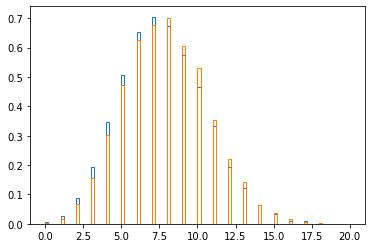

In [49]:
plt.hist(h1,bins=100,density=True,histtype='step')
plt.hist(h2,bins=100,density=True,histtype='step')
plt.show()

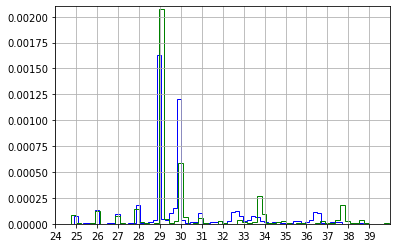

In [60]:
b=(40000-24000)/500
plt.hist(diff1,bins=100,histtype='step',color='blue',density=True)
plt.hist(diff2,bins=100,histtype='step',color='green',density=True)
plt.xticks(ticks=range(24000,40000,1000), labels=['%d'%(x/1000) for x in range(24000,40000,1000)])
#plt.yticks(ticks=[0,0.5e-4,1e-4,1.5e-4,2e-4,2.5e-4,3e-4,3.5e-4,4e-4], labels=['%.5f'%x for x in [0,0.5e-4,1e-4,1.5e-4,2e-4,2.5e-4,3e-4,3.5e-4,4e-4]])
plt.axis([24000,40000,0,0.0021])
plt.grid(True)
plt.show()

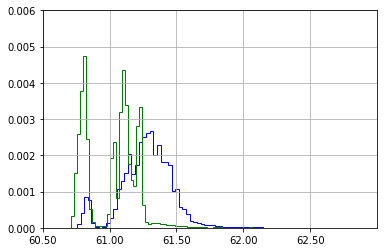

In [54]:
b=(63000-60500)/250
plt.hist(diff_r1,bins=100,histtype='step',color='blue',density=True)
plt.hist(diff_r2,bins=100,histtype='step',color='green',density=True)
plt.xticks(ticks=range(60500,63000,500), labels=['%.2f'%(x/1000) for x in range(60500,63000,500)])
#plt.yticks(ticks=[0,0.5e-3,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,3.5e-3,4e-3], labels=['%.5f'%x for x in[0,0.5e-3,1e-3,1.5e-3,2e-3,2.5e-3,3e-3,3.5e-3,4e-3]])
plt.axis([60500,63000,0,0.006])
plt.grid(True)
plt.show()